# EDA (Exploratory Data Analysis) Diagnostic and Diagnostic Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Read the dataset
df = pd.read_csv("clean_data.csv")

## General Analysis

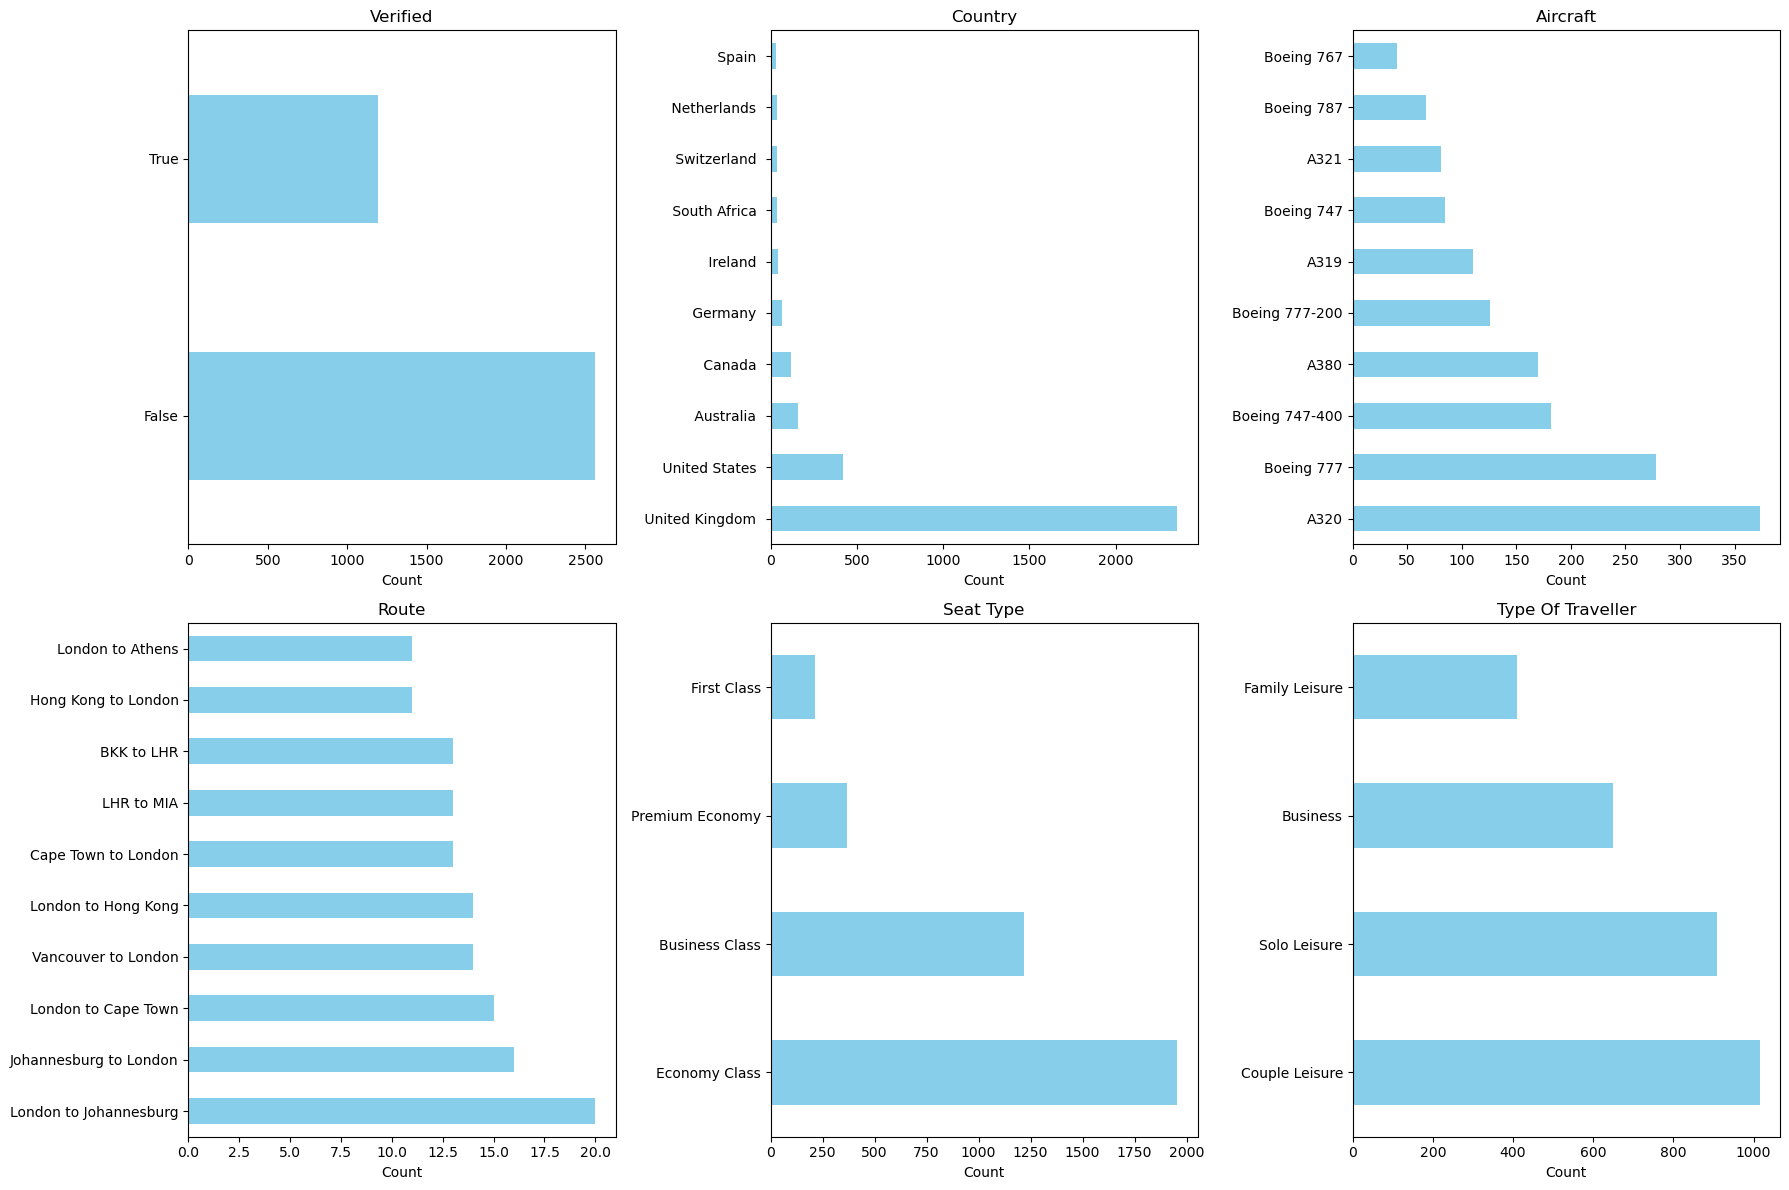

In [13]:
# List of columns to plot
columns_to_plot = ['Verified', 'Country', 'Aircraft', 'Route', 'Seat Type', 'Type Of Traveller']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusted the subplot grid size

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values
    filtered_data = df[column].dropna()
    
    # Count occurrences of each value and select top 10
    top_10_counts = filtered_data.value_counts().head(10).sort_values(ascending=True)
    
    # Plot the data
    top_10_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].invert_yaxis()  # Invert y-axis to display highest count at the top

# Hide the remaining subplots if the number of columns to plot is less than the total number of subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Service Analysis 

In [14]:
df.head()

,Dates Review,Day Review,Month Review,Month Review Number,Year Review,Verified,Review,Customer Name,Month Flown,Month Flown Number,...,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Wifi & Connectivity,Recommended
0,2024-02-23,23,February,2,2024,True,That was supposed to be my flight but it was c...,Peter Hansell,September,9.0,...,Couple Leisure,Economy Class,Pisa to London Heathrow,NaN,NaN,NaN,NaN,1,NaN,no
1,2024-02-21,21,February,2,2024,True,Have no fear when your BA flight is operated b...,Caleb Lowe,February,2.0,...,Couple Leisure,Business Class,Malaga to London Heathrow,5.0,5.0,5.0,4.0,4,NaN,yes
2,2024-02-17,17,February,2,2024,False,We have flown BA five times from western USA t...,Kevin Statham,February,2.0,...,Couple Leisure,Economy Class,Phoenix to Lisbon via London,1.0,5.0,3.0,1.0,1,1.0,no
3,2024-02-17,17,February,2,2024,True,London Heathrow to Istanbul at the start of th...,C Horton,February,2.0,...,Solo Leisure,Economy Class,London to Istanbul,3.0,1.0,1.0,2.0,2,NaN,no
4,2024-02-16,16,February,2,2024,False,"Jan 30th, I booked a last-minute, transatlanti...",Anthony C Gallagher,January,1.0,...,Solo Leisure,Premium Economy,"Austin, TX to Shannon, Ireland via Austin",3.0,5.0,3.0,4.0,2,NaN,no


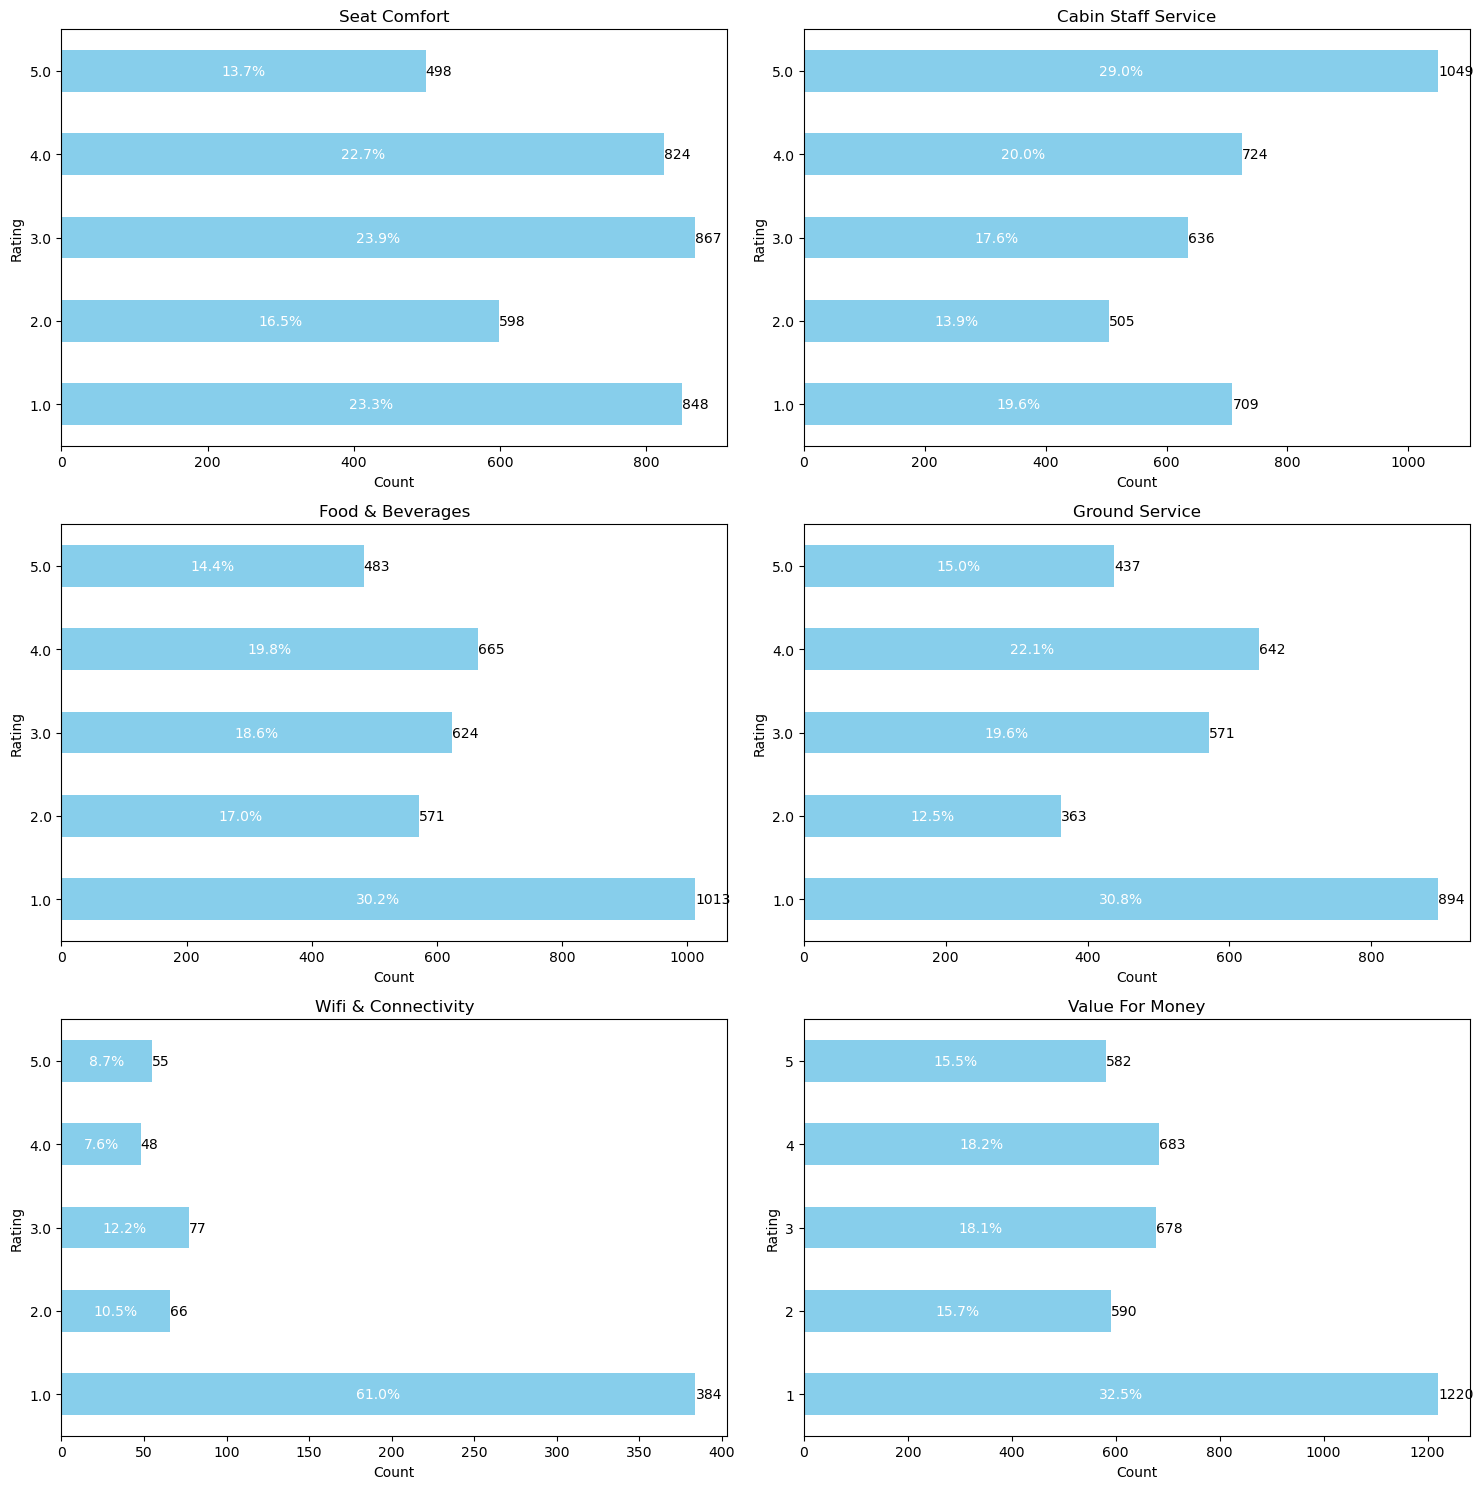

In [4]:
# Define the list of columns
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns):
    # Exclude 0 values for 'Food & Beverages' and 'Value For Money' columns
    if column in ['Food & Beverages', 'Value For Money']:
        filtered_data = df[df[column] > 0]
        counts = filtered_data[column].value_counts().sort_index()
    else:
        counts = df[column].value_counts().sort_index()
    
    # Plot the data horizontally
    counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column)
    axes[i].set_ylabel('Rating')
    axes[i].set_xlabel('Count')
    
    # Calculate percentage of total
    total_count = counts.sum()
    for j, (index, value) in enumerate(counts.items()):
        # Add percentage at the middle of the bar
        percentage = '{:.1f}%'.format(100 * value / total_count)
        axes[i].text(value / 2, j, percentage, ha='center', va='center', color='white')
        
        # Add total count at the right of the bar
        axes[i].text(value, j, str(value), ha='left', va='center', color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
# Define the list of columns
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money
count,3635.000000,3623.000000,3357.000000,2907.000000,630.000000,3754.000000
mean,2.869601,3.248137,2.711349,2.781562,1.926984,2.684070
std,1.362299,1.489696,1.438996,1.459512,1.348992,1.470494
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


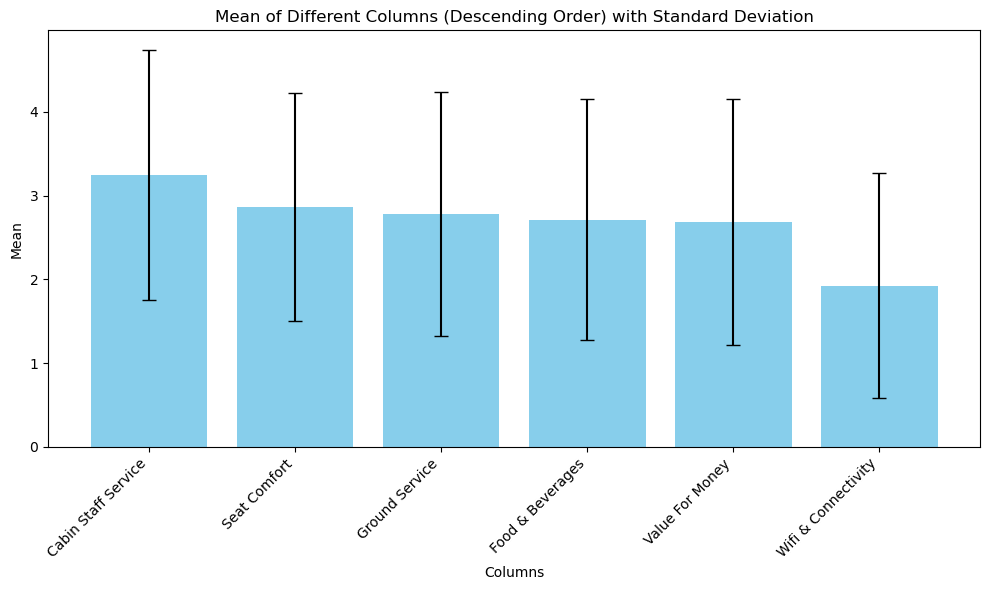

In [6]:
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of Different Columns (Descending Order) with Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

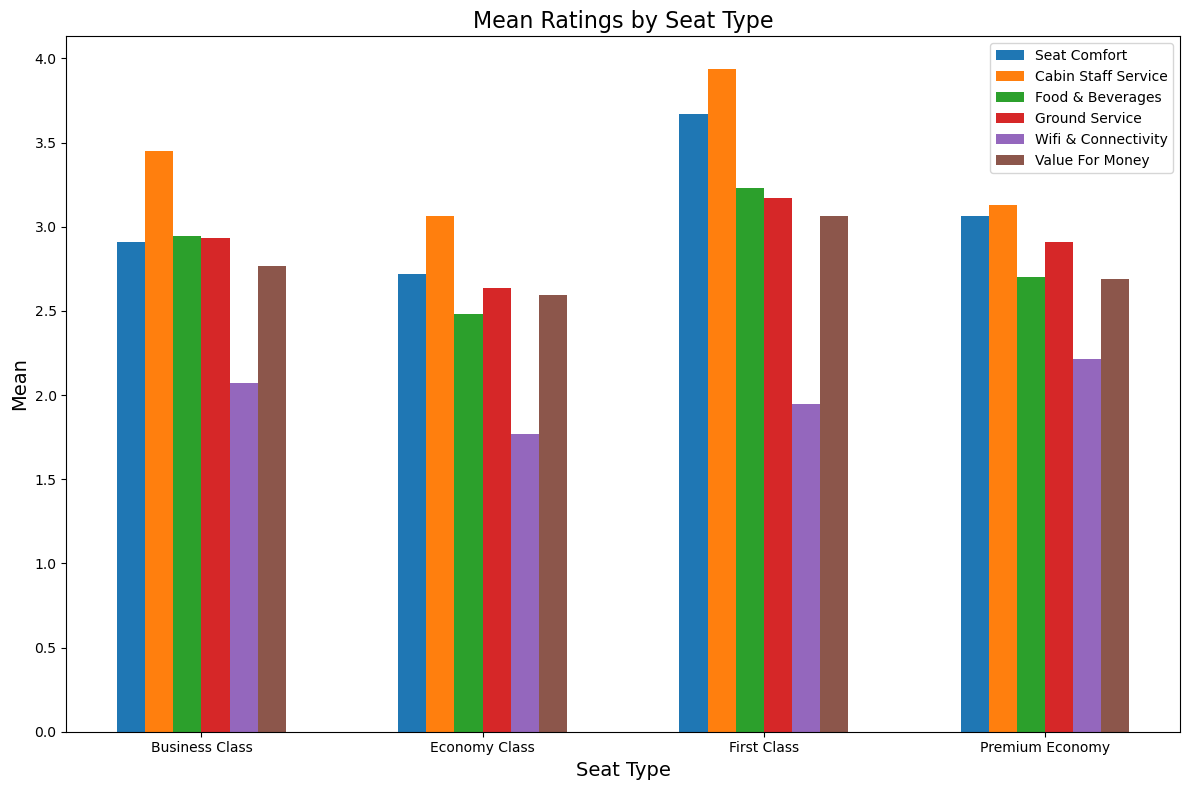

In [16]:
# Define columns of interest
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Group by 'Seat Type' and compute mean for each column
grouped_means = df.groupby('Seat Type')[columns].mean()

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
index = np.arange(len(grouped_means))

# Create bars for each column
for i, column in enumerate(columns):
    plt.bar(index + i * bar_width, grouped_means[column], bar_width, label=column)

# Customize the plot
plt.xlabel('Seat Type', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.title('Mean Ratings by Seat Type', fontsize=16)
plt.xticks(index + bar_width * (len(columns) - 1) / 2, grouped_means.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

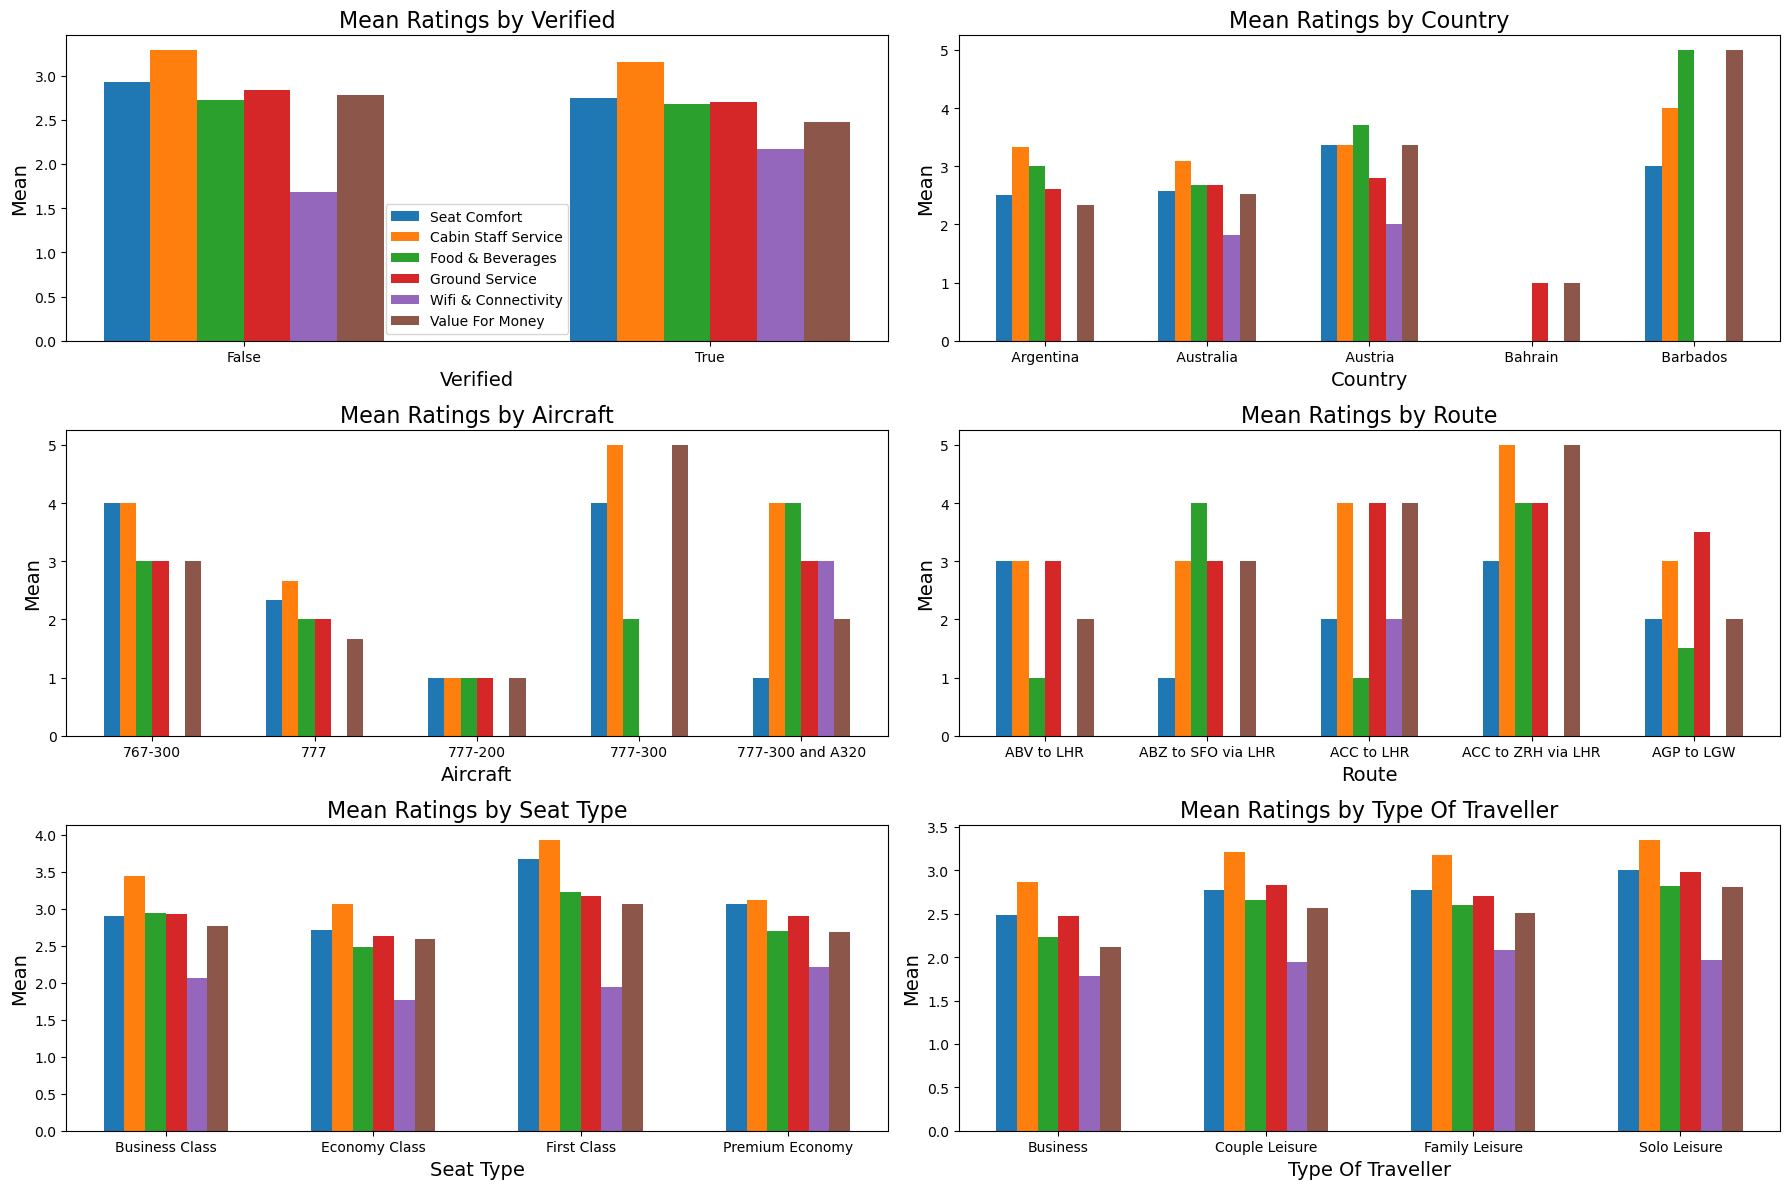

In [20]:
# Define columns of interest
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Define grouping variables
grouping_variables = ['Verified', 'Country', 'Aircraft', 'Route', 'Seat Type', 'Type Of Traveller']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a variable to track if the legend has been drawn
legend_drawn = False

# Iterate over each grouping variable and plot
for i, group_var in enumerate(grouping_variables):
    # Group by the current variable and compute mean for each column
    grouped_means = df.groupby(group_var)[columns].mean().head()

    # Set the positions of the bars on the x-axis
    index = np.arange(len(grouped_means))

    # Set the width of the bars
    bar_width = 0.1

    # Create bars for each column
    for j, column in enumerate(columns):
        axes[i].bar(index + j * bar_width, grouped_means[column], bar_width, label=column)

    # Customize the plot
    axes[i].set_xlabel(group_var, fontsize=14)
    axes[i].set_ylabel('Mean', fontsize=14)
    axes[i].set_title(f'Mean Ratings by {group_var}', fontsize=16)
    axes[i].set_xticks(index + bar_width * (len(columns) - 1) / 2)
    axes[i].set_xticklabels(grouped_means.index)

    # Add the legend only once
    if not legend_drawn:
        axes[i].legend()
        legend_drawn = True

# Hide the remaining subplots if the number of grouping variables is less than the total number of subplots
for j in range(len(grouping_variables), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()